<a href="https://colab.research.google.com/github/rrben/Data_wrangling/blob/main/Data_wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Setup**

In [5]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale, power_transform

from IPython.core.display import HTML
from ipywidgets import interact, widgets

In [6]:
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    rc={
        'figure.figsize': (12,8)
    }
)
#configurar padrão das figuras

In [7]:
#função pra deixar as tabelas na mesma linha (lado a lado)
def display_side_by_side(dataframes:list,titles:list):
    html_str=''
    for df,title in zip(dataframes, titles):
        html_str+=f'<span>{title}:</span>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+="&nbsp"*10
    display(HTML(html_str))

# **Estruturação dos dados**

As principais etapas da estruturação de dados são: Extração, transformação e carregamento. Essas etapas são conhecidas como ETL (Extract, Transform, Load) e compreendem as seguintes atividades:

> Extração: coleta de dados de diversas fontes, como bancos de dados, planilhas, arquivos de texto, sistemas online, entre outros.

> Transformação: processamento e limpeza dos dados, incluindo filtragem, correção de erros, conversão de formatos, enriquecimento com dados adicionais, criação de novas variáveis, entre outras transformações.

> Carregamento: armazenamento dos dados estruturados em um repositório adequado, como um banco de dados ou um arquivo de dados, para que possam ser facilmente acessados e utilizados em análises e outras atividades.

## Merge/Concat/Join

Frequentemente precisamos juntar bases diferentes em um só, para tanto para facilitar análise exploratória quanto para preparar o dataset para modelagem. 

As funções `merge`, `concat` e `join` do Pandas nos ajudam nesta parte de estruturação dos dados, e há um tutorial excelente do próprio Pandas [neste link](https://pandas.pydata.org/docs/user_guide/merging.html#merge-join-concatenate-and-compare). 

### Merge

Este método do pandas é o mais similar aos JOINs do SQL.  
Tabela de exemplo comparativo:


| Merge method   | SQL Join Name    | Description                                         |
|:---------------|:-----------------|:----------------------------------------------------|
| left           | LEFT OUTER JOIN  | Use keys from left frame only                       |
| right          | RIGHT OUTER JOIN | Use keys from right frame only                      |
| outer          | FULL OUTER JOIN  | Use union of keys from both frames                  |
| inner          | INNER JOIN       | Use intersection of keys from both frames           |
| cross          | CROSS JOIN       | Create the cartesian product of rows of both frames |

In [4]:
df1 = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }, index=range(4)
)

df2 = pd.DataFrame(
    {
        "key": ["K1", "K2", "K3", "K4"],
        "C": ["C1", "C2", "C3", "C4"],
        "D": ["D1", "D2", "D3", "D4"],
    }, index=range(1,5)
)

df3 = pd.DataFrame(
    {
        "key": ["K1", "K2", "K3", "K4"],
        "E": ["E1", "E2", "E3", "E4"],
        "F": ["F1", "F2", "F3", "F4"],
    }, index=range(1,5)
)


In [5]:
df2

,key,C,D
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3
4,K4,C4,D4


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     4 non-null      object
 1   A       4 non-null      object
 2   B       4 non-null      object
dtypes: object(3)
memory usage: 224.0+ bytes


In [7]:
display_side_by_side([df1,df2, df3], ['df1','df2', 'df3'])

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3
,key,C,D
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3
4,K4,C4,D4
,key,E,F


In [8]:
# Mostrar merge dos dois jeitos esse exemplo assim:
#exemplo 1:
df1.merge(df2)

# Por padrão, ele traz um inner join das tabelas, trazendo somente os resultados que convergem


,key,A,B,C,D
0,K1,A1,B1,C1,D1
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [9]:
# Exemplo 2:
df1.merge(df3, on='key', how='inner')

# Também é possível setar como queremos a convergencia

,key,A,B,E,F
0,K1,A1,B1,E1,F1
1,K2,A2,B2,E2,F2
2,K3,A3,B3,E3,F3


In [10]:
# Mostrar todos
df_inner = df1.merge(df2, on='key', how='inner') #mantém todas as categorias em comum nos dois df
df_left = df1.merge(df2, on='key', how='left') #mantém todas as categorias existentes na coluna da esquerda
df_right = df1.merge(df2, on='key', how='right') #mantém todas as categorias existentes na coluna da direita
df_outer = df1.merge(df2, on='key', how='outer') #mantém todas as categorias existentes na coluna da direita

#Função de mostrar tabela -> display_side_by_side([lista = formato string])

display_side_by_side(
    dataframes=[df1, df2, df_inner, df_left, df_right, df_outer],
    titles=['df1', 'df2', 'inner_merge', 'left_merge', 'right_merge', 'outer_merge']
)

In [11]:
#função merge da aula
@interact(method=['inner','left', 'right','outer'])
def merge(method):
  df_merge=df1.merge(df2, how=method)
  display_side_by_side(
      [df1,df2,df_merge],
      ['df1','df2',f'{method}_join']
  )

interactive(children=(Dropdown(description='method', options=('inner', 'left', 'right', 'outer'), value='inner…

In [ ]:
#
corte_01= df2.iloc[:2]
corte_02= df2.iloc[-2:]
corte_03= pd.concat([corte_01, corte_02], axis=1)
display_side_by_side([corte_01, corte_02, corte_03], ['corte_01', 'corte_02','corte_03'])

In [ ]:
def merge(merge_method):
  display_side_by_side([df1, df2, df1.merge(df2, how=merge_method)], ['df1','df2', f'{merge_method} merge'])

interact(merge, df1=df1, df2=df2, merge_method=widgets.Dropdown(options=['inner','left','right','outer'], style={'description_width': 'initial'}));

interactive(children=(Dropdown(description='merge_method', options=('inner', 'left', 'right', 'outer'), style=…

O método "merge()" do pandas é utilizado para combinar dois ou mais DataFrames com base em uma ou mais colunas em comum, chamadas de chaves (ou "keys"). Por padrão, o método "merge()" retorna apenas as linhas que possuem valores correspondentes em ambas as tabelas em relação às colunas-chave especificadas. No entanto, o método também pode ser configurado para retornar outras combinações de linhas, como linhas que aparecem apenas em um dos DataFrames ou todas as linhas de ambos os DataFrames.

O processo de comparação de colunas no método "merge()" não se limita às colunas que possuem o mesmo nome. O método permite especificar as colunas-chave de cada DataFrame a serem comparadas, mesmo que os nomes das colunas sejam diferentes. Além disso, o método também permite especificar como as colunas não correspondentes devem ser tratadas, como se devem ser mantidas ou descartadas na tabela resultante.

A principal vantagem de utilizar o Merge na estruturação de dados é a possibilidade de combinar diferentes fontes de dados em um único conjunto.

O método merge() permite combinar diferentes DataFrames com base em uma ou mais colunas em comum, chamadas de chaves, criando um novo DataFrame que contém todas as informações das tabelas originais. Isso é especialmente útil quando se trabalha com dados de diferentes fontes ou que estão armazenados em diferentes tabelas, permitindo que o analista junte as informações em uma única tabela para análise.

Embora o Merge possa, em alguns casos, resultar em uma redução no tamanho do conjunto de dados ou em um aumento da velocidade de processamento, esses não são os principais benefícios da estruturação de dados com o Merge. A facilidade de manipulação dos dados após a união pode variar de acordo com a complexidade da união e o formato dos dados originais, mas também não é a principal vantagem desse método.

### Concat

A concatenação acontece quando temos que juntar as tabelas uma abaixo da outra (equivalente ao `UNION` do  SQL), ou uma ao lado da outra.

Por exemplo de concatenação vertical (default) `pd.concat([df1,df2,df3])`:  
![](https://pandas.pydata.org/docs/_images/merging_concat_basic.png)  
<caption><b>Fonte:</b> <a href="https://pandas.pydata.org/docs/user_guide/merging.html">https://pandas.pydata.org/docs/user_guide/merging.html</a></caption>

Exemplo de concatenação horizontal (`pd.concat([df1,df4], axis=1)`):
![](https://pandas.pydata.org/docs/_images/merging_concat_axis1.png)  
<caption><b>Fonte:</b> <a href="https://pandas.pydata.org/docs/user_guide/merging.html">https://pandas.pydata.org/docs/user_guide/merging.html</a></caption>





O método concat() do pandas é usado para combinar DataFrames, mas ele concatena os DataFrames na horizontal (juntando as colunas) ou na vertical (juntando as linhas), independentemente do nome ou número de colunas que os DataFrames possuem.

Se os DataFrames tiverem diferentes colunas, concat() não conseguirá alinhar as colunas automaticamente. Para combinar DataFrames com colunas diferentes, pode ser necessário renomear ou adicionar colunas em um ou ambos os DataFrames para que eles tenham as mesmas colunas antes de concatená-los.

Para juntar DataFrames com colunas diferentes, é necessário fazer ajustes prévios nas colunas e, em seguida, usar o concat() na dimensão apropriada (horizontal ou vertical).

In [ ]:
#@title
%%html
<style>
div.warn {    
    color: #9E8C50;
    background-color: #F8F4C3;
    border-left: 5px solid #9E8C50;
    padding: 0.5em;
    }
 </style>
<div class=warn>
<b>Nota: </b> Observe que, por padrão, Pandas considera os nomes das colunas e índeces ao unir as tabelas.
</div>

In [ ]:
# Separando exemplo de data_frame
df_A = df1.iloc[:2]
df_B = df1.iloc[2:]
display_side_by_side([df_A,df_B], ['df_A','df_B'])

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
,key,A,B
2,K2,A2,B2
3,K3,A3,B3


In [ ]:
# Concatenando verticalmente
pd.concat([df_A,df_B])

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [ ]:
# Concatenando horizontalmente
pd.concat([df_A,df_B], axis=1)

,key,A,B,key,A,B
0,K0,A0,B0,NaN,NaN,NaN
1,K1,A1,B1,NaN,NaN,NaN
2,NaN,NaN,NaN,K2,A2,B2
3,NaN,NaN,NaN,K3,A3,B3


In [ ]:
# Concatenando horizontalmente, forçando mesmo index
pd.concat([df_A,df_B.reset_index()], axis=1)

,key,A,B,index,key,A,B
0,K0,A0,B0,2,K2,A2,B2
1,K1,A1,B1,3,K3,A3,B3


### Join

A função join do Pandas considere como chave o index:

![](https://pandas.pydata.org/docs/_images/merging_join.png)

In [ ]:
df_left = pd.DataFrame({
    'A':['A0', 'A1', 'A2'],
    'B':['B0','B1','B2']
}, index=['K0','K1','K2'])

df_right = pd.DataFrame({
    'C':['C0','C1', 'C2'],
    'D':['D0','D1','D2']
}, index=['K0','K2','K3'])

df_join = df_left.join(df_right, how='inner')

display_side_by_side([df_left, df_right, df_join],['df_left', 'df_right', 'df_join'] )

## Group by

Um dos métodos mais utilizados do Pandas (e em outras linguagens) é o `groupby`.

A lógica do `groupby` é bem simples e conhecida como **split-apply-combine:**

1. A primeira etapa é separar a tabela (split) em tabelas menores, cada uma com categorias únicas (representando um grupo) da(s) coluna(s) que desejamos agrupar.
> O conjunto de dados é dividido em grupos com base nos valores em uma ou mais colunas. Essas colunas são especificadas como argumentos no método groupby(). Por exemplo, se quisermos agrupar um conjunto de dados por valores na coluna 'A', usamos df.groupby('A').

2. Aplicar uma função separadamente em cada uma destas tabelas. Pode ser uma função de **agregação** gerando uma métrica de resumo, uma função de **transformação**, modificando os valores, ou uma função de **filtro**, onde filtraremos grupos que se encaixam dentro de uma regra.

> Depois de agrupar os dados, uma função é aplicada a cada grupo. Essa função pode ser uma agregação, como sum(), mean(), max() ou min(), ou uma transformação, como apply() ou transform(). A função de agregação retorna um único valor para cada grupo, enquanto a função de transformação retorna um conjunto de valores que devem ser combinados posteriormente.

3. Por fim, combina-se novamente estas tabelas para formar uma única tabela de saída.

Segue um esquema de exemplo com um função de agregação (soma):

![](https://miro.medium.com/max/2400/1*w2oGdXv5btEMxAkAsz8fbg.png)  
Fonte: [https://medium.com/analytics-vidhya/split-apply-combine-strategy-for-data-mining-4fd6e2a0cc99](https://medium.com/analytics-vidhya/split-apply-combine-strategy-for-data-mining-4fd6e2a0cc99)

Maiores detalhes no [guia de uso da documentação](https://pandas.pydata.org/docs/user_guide/groupby.html#group-by-split-apply-combine).

Esse método é bastante utilizado usado para agrupar dados com base em uma ou mais colunas, aplicar uma função a esses grupos e retornar o resultado em um novo DataFrame.

O resultado do método group by é um objeto GroupBy, que pode ser usado para executar várias operações, como: 
> Agregação: usando funções de agregação como sum(), mean(), max(), min(), count() etc., para calcular estatísticas resumidas para cada grupo.

> Filtragem: usando a função filter() para excluir grupos com base em algum critério.

> Transformação: usando a função transform() para aplicar uma função a cada grupo e retornar os resultados combinados em um novo DataFrame.

> Aplicação: usando a função apply() para aplicar uma função personalizada a cada grupo.

O método group by é uma ferramenta poderosa para analisar e resumir grandes conjuntos de dados, permitindo que os usuários agreguem, filtrem, transformem e apliquem funções personalizadas a grupos de dados.

In [ ]:
# Vamos utilizar como exemplo o dataset de gorjetas em um restaurante
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


###Agregações


In [ ]:
# Podemos agrupar por uma coluna e aplicar uma função em todas colunas (passíveis de aplicação da função) 
df.groupby(['sex']).mean()

<ipython-input-151-209ae5e60181>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,total_bill,tip,size
sex,,,
Male,20.744076,3.089618,2.630573
Female,18.056897,2.833448,2.459770


In [ ]:
# Podemos agrupar por uma coluna e aplicar uma função em uma coluna-alvo retornando um pandas.Series
df.groupby('sex')['total_bill'].mean()

sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

In [ ]:
# Podemos agrupar por uma coluna e aplicar uma função em um coluna-alvo retornando um pandas.DataFrame (duplo "[[")
df.groupby(['smoker'])[['total_bill']].sum()

,total_bill
smoker,
Yes,1930.34
No,2897.43


In [ ]:
# Podemos agrupar por múltiplas colunas
df.groupby(['time','day'])[['total_bill', 'tip']].agg(['mean', 'max','min', 'sum', 'count'])

total_bill                                    tip               \
                  mean    max    min      sum count      mean    max   min   
time   day                                                                   
Lunch  Thur  17.664754  43.11   7.51  1077.55    61  2.767705   6.70  1.25   
       Fri   12.845714  16.27   8.58    89.92     7  2.382857   3.48  1.58   
       Sat         NaN    NaN    NaN     0.00     0       NaN    NaN   NaN   
       Sun         NaN    NaN    NaN     0.00     0       NaN    NaN   NaN   
Dinner Thur  18.780000  18.78  18.78    18.78     1  3.000000   3.00  3.00   
       Fri   19.663333  40.17   5.75   235.96    12  2.940000   4.73  1.00   
       Sat   20.441379  50.81   3.07  1778.40    87  2.993103  10.00  1.00   
       Sun   21.410000  48.17   7.25  1627.16    76  3.255132   6.50  1.01   

                           
                sum count  
time   day                 
Lunch  Thur  168.83    61  
       Fri    16.68     7  
       Sat     0.00     0  
       Sun     0.00     0  
Dinner Thur    3.00     1  
       Fri    35.28    12  
       Sat   260.40    87  
       Sun   247.39    76

In [ ]:
# Podemos aplicar múltiplas funções de agregação suportadas pelo pandas
df.groupby(['time'])[['total_bill']].agg(['min','median','max'])

total_bill               
              min  median    max
time                            
Lunch        7.51  15.965  43.11
Dinner       3.07  18.390  50.81

In [ ]:
# Podemos aplicar funções customizadas simples
df.groupby(['time'])[['total_bill']].apply(lambda x: np.sum(x)+1)

,total_bill
time,
Lunch,1168.47
Dinner,3661.30


In [ ]:
## Mais exemplos

# Podemos agrupar por uma coluna e aplicar uma função em todas colunas (passíveis de aplicação da função) 
df.groupby(['sex']).sum()

# Podemos agrupar por uma coluna e aplicar uma função em um coluna-alvo retornando um pandas.Series
df.groupby(['sex'])['total_bill'].sum()

# Podemos agrupar por uma coluna e aplicar uma função em um coluna-alvo retornando um pandas.DataFrame (duplo "[[")
df.groupby(['smoker'])[['total_bill']].sum()

# Podemos agrupar por múltiplas colunas
df.groupby(['sex','smoker'])[['total_bill']].mean()

# Podemos aplicar múltiplas funções de agregação suportadas pelo pandas
df.groupby(['time'])[['total_bill']].agg(['min','median','max'])

# Podemos aplicar funções customizadas simples
df.groupby(['time'])[['total_bill']].apply(lambda x: np.sum(x)+1)

# Podemos aplicar funções customizadas mais complexas
def mean_diff(subdf):
  """Calcula a média do quanto cada gorjeta representou da conta total"""
  return np.mean( subdf['tip'] / subdf['total_bill'] )

df.groupby('sex').apply(lambda x: str(round(mean_diff(x)*100, 2))+'%')



<ipython-input-157-af3d4e977eaa>:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



sex
Male      15.77%
Female    16.65%
dtype: object

In [ ]:
## -- Transformação -- ##

# Padronização por grupo
df.groupby('sex')[['total_bill','tip']].transform(scale)

# Rolling mean
df.groupby('sex')[['total_bill','tip']].rolling(3).mean()

total_bill       tip
sex                             
Male   1           NaN       NaN
       2           NaN       NaN
       3     18.343333  2.823333
       5     23.326667  3.840000
       6     19.246667  3.340000
...                ...       ...
Female 226   14.113333  2.500000
       229   16.160000  2.460000
       238   22.680000  3.183333
       240   28.376667  3.183333
       243   27.263333  3.223333

[244 rows x 2 columns]

In [ ]:
groups = df.groupby(['sex','smoker'])

In [ ]:
groups.get_group(('Female','Yes'))

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
72,26.86,3.14,Female,Yes,Sat,Dinner,2
73,25.28,5.00,Female,Yes,Sat,Dinner,2
92,5.75,1.00,Female,Yes,Fri,Dinner,2
93,16.32,4.30,Female,Yes,Fri,Dinner,2
100,11.35,2.50,Female,Yes,Fri,Dinner,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2
102,44.30,2.50,Female,Yes,Sat,Dinner,3
103,22.42,3.48,Female,Yes,Sat,Dinner,2
109,14.31,4.00,Female,Yes,Sat,Dinner,2


###Demonstração Gráfica

<ipython-input-161-1c2cd1305097>:7: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.




tip    smoker
1.00   Yes        3.00
       No         1.00
1.01   Yes        0.00
       No         1.01
1.10   Yes        1.10
                 ...  
7.58   No         7.58
9.00   Yes        0.00
       No         9.00
10.00  Yes       10.00
       No         0.00
Name: tip, Length: 246, dtype: float64 



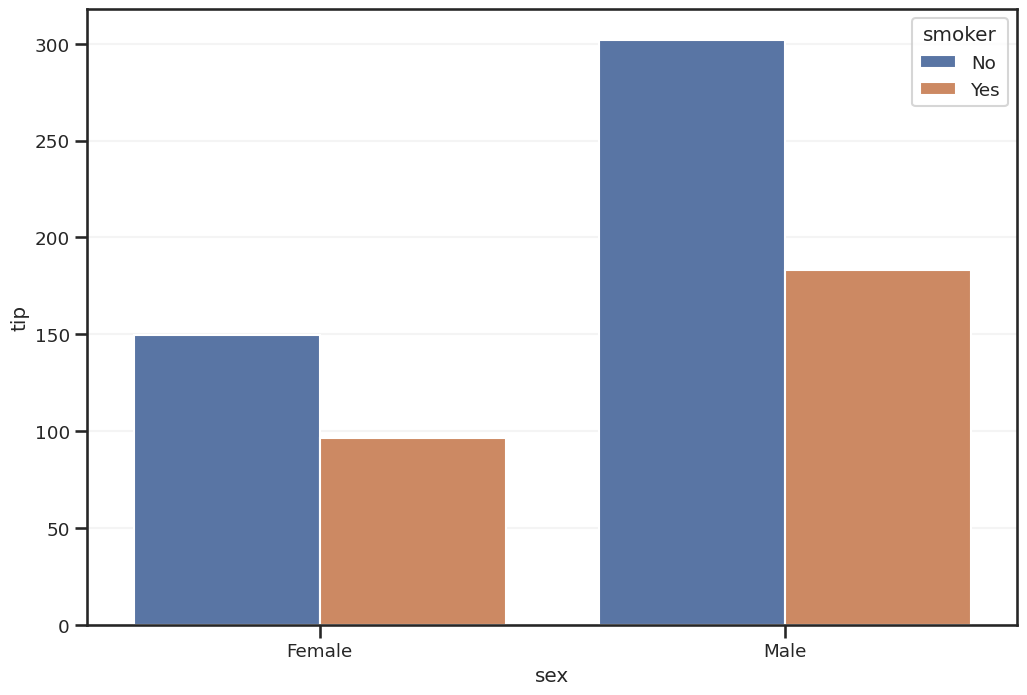

In [ ]:
# Exemplo das mesmas informações com groupby e plot

# Groupby
print(df.groupby(['tip','smoker']).tip.sum(), '\n')

# Seaborn barplot
sns.barplot(data=df, x='sex', y='tip', hue='smoker', order=['Female','Male'], hue_order=['No','Yes'], estimator=np.sum, ci=False)
plt.grid(axis='y', alpha=.2)
plt.show()

# Plotly barplot
px.bar(data_frame=df, x='sex', y='tip', color='smoker', barmode="group")

## Pivot table

A **Pivot Table** é uma ferramenta muito útil em análise de dados que permite reorganizar e resumir dados em uma tabela dinâmica. Através dela, é possível agrupar, somar, contar, calcular a média, calcular desvios-padrão, dentre outros cálculos, de forma rápida e fácil.

Funciona com base em colunas de uma tabela, onde podemos escolher uma ou mais colunas para serem usadas como índices e outras colunas para serem usadas como colunas de referência. A partir dessas colunas, a Pivot Table agrupa os dados e calcula as métricas escolhidas, criando uma nova tabela com os resultados.

> Exemplo: temos uma tabela com dados de vendas de uma empresa, contendo informações como data da venda, vendedor, produto e quantidade vendida. Podemos utilizar a Pivot Table para analisar as vendas por produto e vendedor, calculando a quantidade total vendida por vendedor para cada produto.

> Especificando as colunas de índice, as colunas de valores e as funções de agregação desejadas. O resultado será uma nova tabela com os valores resumidos de acordo com as especificações.

Esta ferramenta é muito útil para análise exploratória de dados, permitindo que sejam obtidas informações valiosas de forma rápida e fácil.




In [ ]:
# primeiras linhas
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# exemplo de pivot: sex - time - tip
df.pivot_table(index='sex', columns='day', values='tip')

# Padrão dos valores é a média

day,Thur,Fri,Sat,Sun
sex,,,,
Male,2.980333,2.693000,3.083898,3.220345
Female,2.575625,2.781111,2.801786,3.367222


In [ ]:
# exemplo de pivot: sex - time - total_bill/tip
df.pivot_table(index='sex', columns='time', values=['total_bill','tip'], aggfunc=['sum', 'mean'])

sum                                  mean                       \
          tip         total_bill                tip           total_bill   
time    Lunch  Dinner      Lunch   Dinner     Lunch    Dinner      Lunch   
sex                                                                        
Male    95.11  389.96     595.60  2661.22  2.882121  3.144839  18.048485   
Female  90.40  156.11     571.87   999.08  2.582857  3.002115  16.339143   

                   
                   
time       Dinner  
sex                
Male    21.461452  
Female  19.213077

In [ ]:
# exemplo de pivot: sex - time/day - total_bill/tip
df.pivot_table(index='sex', columns=['time','day'], values=['total_bill','tip'], aggfunc=np.median)

tip                                 total_bill                       \
time   Lunch       Dinner                         Lunch        Dinner          
day     Thur   Fri   Thur  Fri    Sat    Sun       Thur    Fri   Thur    Fri   
sex                                                                            
Male    2.53  1.92    NaN  3.0  3.000  3.085     16.975  12.16    NaN  22.49   
Female  2.00  2.75    3.0  3.0  2.625  3.500     13.420  14.70  18.78  15.38   

                       
time                   
day       Sat     Sun  
sex                    
Male    18.24  20.725  
Female  18.36  17.410

In [ ]:
# Exemplo com groupby para comparação
df.groupby(['sex','time','day'])[['total_bill','tip']].median()

total_bill    tip
sex    time   day                    
Male   Lunch  Thur      16.975  2.530
              Fri       12.160  1.920
              Sat          NaN    NaN
              Sun          NaN    NaN
       Dinner Thur         NaN    NaN
              Fri       22.490  3.000
              Sat       18.240  3.000
              Sun       20.725  3.085
Female Lunch  Thur      13.420  2.000
              Fri       14.700  2.750
              Sat          NaN    NaN
              Sun          NaN    NaN
       Dinner Thur      18.780  3.000
              Fri       15.380  3.000
              Sat       18.360  2.625
              Sun       17.410  3.500

In [ ]:
# Exemplo de pivot com múltiplas funções de agregação
df.pivot_table(index='sex', columns='time', values='tip', aggfunc=['mean', np.median, np.std, lambda x: x.sum()])

mean           median              std           <lambda>        
time       Lunch    Dinner  Lunch Dinner     Lunch    Dinner    Lunch  Dinner
sex                                                                          
Male    2.882121  3.144839   2.31    3.0  1.329017  1.529116    95.11  389.96
Female  2.582857  3.002115   2.01    3.0  1.075108  1.193483    90.40  156.11

In [ ]:
# Exemplo de pivot especificando funções em dicionário

agg_dict = {'tip': 'mean', 'total_bill':[np.median, 'min']}

df.pivot_table(index='sex', columns='time', aggfunc=agg_dict)

tip           total_bill                    
            mean               median          min       
time       Lunch    Dinner      Lunch Dinner Lunch Dinner
sex                                                      
Male    2.882121  3.144839      16.58  19.63  7.51   7.25
Female  2.582857  3.002115      13.42  17.19  8.35   3.07

Tabelas no formato long e wide:

In [ ]:
df.groupby(['day','time'])['tip'].mean()

day   time  
Thur  Lunch     2.767705
      Dinner    3.000000
Fri   Lunch     2.382857
      Dinner    2.940000
Sat   Lunch          NaN
      Dinner    2.993103
Sun   Lunch          NaN
      Dinner    3.255132
Name: tip, dtype: float64

In [ ]:
df.pivot_table(index='time', columns='day', values='tip')

day,Thur,Fri,Sat,Sun
time,,,,
Lunch,2.767705,2.382857,NaN,NaN
Dinner,3.000000,2.940000,2.993103,3.255132


In [ ]:
# Selecionando as colunas day,time e tip, a tabela pode ser considerada long, pois elementos se repetem:
df_pivot = df.pivot_table(index='day', columns='time', values='tip').reset_index()
df_pivot

time,day,Lunch,Dinner
0,Thur,2.767705,3.000000
1,Fri,2.382857,2.940000
2,Sat,NaN,2.993103
3,Sun,NaN,3.255132


In [ ]:
# Usando pivot_table, a tabela ficaria no formato wide, pois os elementos não se repetem
df_pivot.melt(id_vars='day')


,day,time,value
0,Thur,Lunch,2.767705
1,Fri,Lunch,2.382857
2,Sat,Lunch,NaN
3,Sun,Lunch,NaN
4,Thur,Dinner,3.000000
5,Fri,Dinner,2.940000
6,Sat,Dinner,2.993103
7,Sun,Dinner,3.255132


In [ ]:
# Para transformar em long novamente, utilizamos a função `melt` e podemos plotar utilizando seaborn/plotly
df_pivot.melt(id_vars='day')\
.plot.bar(backend='plotly', x='day', y='value', color='time', barmode='group')

# Categorical encoding

**Disclaimer sobre variáveis numéricas:**

Para as variáveis numéricas, alguns algoritmos requerem que os dados estejam **padronizados**. Vimos em data cleaning, ao lidar com outliers, a função `scale` do `sklearn` que padroniza por Z-score. Vale olhar também o `minmax_scale`, outro metódo de pradonização comum que transforma os dados em valores de 0 a 1 (zero sendo o valor mínimo e 1 o máximo). 

Também vimos as funções de **transformação** como Box-Cox, que aproxima a distribuição dos dados à uma distribuição normal. 

Todos estes métodos já foram abordados e podem ser utilizados para tratar variáveis numéricas para modelos que necessitem deste tratamento.

&nbsp;

---

&nbsp;

**Encoding de variáveis categóricas**

As variáveis categóricas precisam, necessariamente, ser tratadas para que sejam representadas por números, uma vez que os modelos não compreendem texto.

Obs: Alguns modelos podem até permitir input de texto, mas dentro deles eles mesmos fazem essa tratativa de encoding.

Existem duas abordagens principais para encoding de variáveis categóricas:
1. OneHotEncoding: criação de novas colunas para cada categoria informando se esta categoria está ou não presente nas respectivas observações
2. LabelEncoder/OrdinalEncoder: substitui o texto das categorias por números, matendo um "dicionário" para saber ter o mapeamento do que cada número representa.

## OneHotEncoder

O One-Hot Encoding é uma técnica de pré-processamento de dados usada para transformar variáveis categóricas em variáveis numéricas que podem ser usadas em algoritmos de aprendizado de máquina. O processo envolve a criação de novas colunas binárias para cada categoria única presente na variável categórica original. Cada nova coluna representa uma categoria, e os valores nessas colunas indicam se a categoria correspondente está ou não presente em cada observação.

Por exemplo, se uma variável categórica "frutas" tem três categorias possíveis "maçã", "banana" e "laranja", o One-Hot Encoding criaria três novas colunas, "maçã", "banana" e "laranja". Em cada linha do DataFrame, apenas uma dessas colunas terá o valor 1 e as outras duas colunas terão o valor 0, indicando qual fruta está presente nessa observação.

Essa técnica é frequentemente usada em problemas de classificação, onde algoritmos de aprendizado de máquina requerem entradas numéricas, e não categóricas. O One-Hot Encoding permite que variáveis categóricas sejam representadas numericamente sem impor uma ordem ou relação entre as categorias.



Uma opção seria utilizar diretamente o pandas para este propósito:

In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
pd.get_dummies(df)

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1,0,0,1,0,0,1,0,0,1
240,27.18,2.00,2,0,1,1,0,0,0,1,0,0,1
241,22.67,2.00,2,1,0,1,0,0,0,1,0,0,1
242,17.82,1.75,2,1,0,0,1,0,0,1,0,0,1


Ou também podemos utilizar

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(drop='if_binary')
encoder

OneHotEncoder(drop='if_binary')

In [ ]:
df.select_dtypes(exclude='category')

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


In [ ]:
categorical_columns = df.select_dtypes(exclude='number').columns

In [ ]:
encoder.fit(df[categorical_columns])

OneHotEncoder(drop='if_binary')

In [ ]:
encoder.categories_
encoder.drop_idx_
encoder.feature_names_in_
encoder.get_feature_names_out()

array(['sex_Male', 'smoker_Yes', 'day_Fri', 'day_Sat', 'day_Sun',
       'day_Thur', 'time_Lunch'], dtype=object)

In [ ]:
encoder.categories_

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Fri', 'Sat', 'Sun', 'Thur'], dtype=object),
 array(['Dinner', 'Lunch'], dtype=object)]

In [ ]:
encoder.drop_idx_

array([0, 0, None, 0], dtype=object)

In [ ]:
encoder.feature_names_in_

array(['sex', 'smoker', 'day', 'time'], dtype=object)

In [ ]:
encoder.get_feature_names_out()

array(['sex_Male', 'smoker_Yes', 'day_Fri', 'day_Sat', 'day_Sun',
       'day_Thur', 'time_Lunch'], dtype=object)

In [ ]:
pd.DataFrame(
    data=encoder.transform(df[categorical_columns]).toarray(),
    columns=encoder.get_feature_names_out()
)

,sex_Male,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Lunch
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
239,1.0,0.0,0.0,1.0,0.0,0.0,0.0
240,0.0,1.0,0.0,1.0,0.0,0.0,0.0
241,1.0,1.0,0.0,1.0,0.0,0.0,0.0
242,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
#encoder.transform(df[categorical_columns].replace({'Male':'male'}))

## LabelEncoder / OrdinalEncoder

Ao contrário do One-Hot Encoding, o Label Encoding não cria novas colunas para cada categoria. Em vez disso, ele atribui um número inteiro a cada categoria única presente na variável categórica original, mantendo um dicionário para mapear cada número a uma categoria.

Por exemplo, se uma variável categórica "frutas" tem três categorias possíveis "maçã", "banana" e "laranja", o Label Encoding atribuiria o valor 0 à "maçã", o valor 1 à "banana" e o valor 2 à "laranja". O dicionário correspondente seria {0: 'maçã', 1: 'banana', 2: 'laranja'}.

Essa técnica é útil quando a ordem das categorias é importante e tem um significado natural, como em dados ordinais (por exemplo, escalas de avaliação de 1 a 5). No entanto, o Label Encoding não é adequado para variáveis categóricas em que não há relação natural entre as categorias, como em dados nominais.

É importante destacar que o Label Encoding também é limitado quando aplicado a algoritmos de aprendizado de máquina que supõem uma ordem ou relação numérica entre as categorias. Nesses casos, o One-Hot Encoding é geralmente preferível.

Usando pandas

In [ ]:
# Convertendo para categoria
df_cat = df.copy()

df_cat[categorical_columns] = df_cat[categorical_columns].astype('category')
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
{col: dict( enumerate(df_cat[col].cat.categories) ) for col in categorical_columns}

{'sex': {0: 'Male', 1: 'Female'},
 'smoker': {0: 'Yes', 1: 'No'},
 'day': {0: 'Thur', 1: 'Fri', 2: 'Sat', 3: 'Sun'},
 'time': {0: 'Lunch', 1: 'Dinner'}}

In [ ]:
# Pegando das categorias

In [ ]:
# Modificando colunas
df_cat[categorical_columns] = df_cat[categorical_columns].apply(lambda x: x.cat.codes)

In [ ]:
df_cat.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,1,3,1,2
1,10.34,1.66,0,1,3,1,3
2,21.01,3.50,0,1,3,1,3
3,23.68,3.31,0,1,3,1,2
4,24.59,3.61,1,1,3,1,4


In [ ]:
# Usando factorize
df['sex'].factorize()

(array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
        0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
        1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
        0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
        1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
        1, 0]),
 CategoricalIndex(['Female', 'Male'], categories=['Male', 'Female'], ordered=False, dtype='category'))

Usando sklearn

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
OrdinalEncoder?

In [ ]:
# Instanciando OrginalEncoder
encoder = OrdinalEncoder().fit(df[categorical_columns])

In [ ]:
# Mostrando atributos
encoder.categories_

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Fri', 'Sat', 'Sun', 'Thur'], dtype=object),
 array(['Dinner', 'Lunch'], dtype=object)]

In [ ]:
# Transformando dados esperados
df_cat[categorical_columns] = encoder.transform(df[categorical_columns])

# **Filtros**

Filtros são utilizados para selecionar subconjuntos de dados que atendem a determinadas condições. Eles são úteis para explorar os dados e realizar análises específicas em subconjuntos de dados selecionados.

São criados utilizando operadores lógicos (>, <, ==, !=, >=, <=), que retornam um array booleano do mesmo tamanho do dataframe original, indicando quais linhas atendem à condição especificada. Esse array booleano é então utilizado para indexar o dataframe original, selecionando apenas as linhas que atendem à condição.

Em geral, há dois tipos principais de filtros em pandas: filtros baseados em condições (usando operadores lógicos) e filtros baseados em valores (usando métodos de seleção de valores).

**Baseados em condições:**
>Seleciona-se as linhas que atendem a uma ou mais condições definidas em uma ou mais colunas. Por exemplo, selecionar todas as linhas em que a coluna "idade" é maior que 30 e a coluna "gênero" é feminino.

**Baseados em valores:**
>Seleciona-se as linhas com base em valores específicos em uma ou mais colunas. Por exemplo, selecionar todas as linhas em que a coluna "gênero" é igual a "feminino". 
>Seleciona-se linhas com base em correspondência parcial ou total em uma coluna. Por exemplo, selecionar todas as linhas em que a coluna "nome" contém a string "John".

>Seleciona-se linhas com base em posição em uma coluna. Por exemplo, selecionar as primeiras 10 linhas de uma coluna.


Além desses tipos principais, há vários métodos adicionais de filtro em pandas que podem ser úteis em diferentes situações. Por exemplo, métodos de filtro de valores nulos, métodos de filtro de valores duplicados, métodos de filtro com base em índices e métodos de filtro com base em funções personalizadas.

# **Filtros com query**

O método query() em Pandas é uma forma de aplicar filtros em um DataFrame com base em uma expressão lógica. Essa expressão pode ser escrita em uma string e passada como argumento para o método.

Por exemplo: temos um DataFrame df com as colunas "nome", "idade" e "salário" e queremos filtrar as linhas onde a idade é maior ou igual a 30 e o salário é menor ou igual a 5000. Podemos usar a seguinte expressão lógica na função query(): **df_filtrado = df.query("idade >= 30 and salario <= 5000")**

Isso criará um novo DataFrame chamado df_filtrado contendo apenas as linhas que satisfazem a expressão lógica dada.

Esse método é útil porque permite escrever as condições de filtro de forma mais clara e concisa, usando a sintaxe do Python, e também evita possíveis problemas com a prioridade de operadores lógicos.



In [ ]:
# Filtro convencional
df.head()

df[df.tip > 4].head()

,total_bill,tip,sex,smoker,day,time,size
5,25.29,4.71,Male,No,Sun,Dinner,4
11,35.26,5.00,Female,No,Sun,Dinner,4
20,17.92,4.08,Male,No,Sat,Dinner,2
23,39.42,7.58,Male,No,Sat,Dinner,4
28,21.70,4.30,Male,No,Sat,Dinner,2


In [ ]:
# Filtro com query

df.query('tip > 4').head()

,total_bill,tip,sex,smoker,day,time,size
5,25.29,4.71,Male,No,Sun,Dinner,4
11,35.26,5.00,Female,No,Sun,Dinner,4
20,17.92,4.08,Male,No,Sat,Dinner,2
23,39.42,7.58,Male,No,Sat,Dinner,4
28,21.70,4.30,Male,No,Sat,Dinner,2


# **Filtros com Query e variável**

Podemos usar variáveis em uma expressão de filtro com a função query(). A seguir, um exemplo de como aplicar filtros usando query() e uma variável:

Suponhamos que temos um DataFrame df com uma coluna 'age' e queira filtrar apenas os valores maiores que uma idade mínima definida por uma variável min_age. Você pode usar a função query() da seguinte forma:

**min_age = 18
filtered_df = df.query('age > @min_age')**

A expressão de filtro **'age > @min_age'** usa a sintaxe **@variável** para indicar que o valor da variável **min_age** deve ser usado na expressão.

O resultado será um novo DataFrame filtered_df contendo apenas as linhas em que o valor da coluna **'age'** é maior que **min_age**.

In [ ]:
# Filtro com query e variável
minimo_aceitavel = 3
df.query('tip>@minimo_aceitavel')

,total_bill,tip,sex,smoker,day,time,size
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
7,26.88,3.12,Male,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
219,30.14,3.09,Female,Yes,Sat,Dinner,4
221,13.42,3.48,Female,Yes,Fri,Lunch,2
232,11.61,3.39,Male,No,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3


# **Múltiplos Filtros Convencionais**
Para realizar múltiplos filtros convencionais em um DataFrame do Pandas, podemos utilizar os operadores lógicos **& (e)** e **| (ou)** para combinar as condições.

Por exemplo, queremos filtrar um DataFrame chamado df que contém informações sobre vendas, com base nas seguintes condições:

*   O Produto é "A" ou "B";
*   O Valor da venda é maior do que 100;
*   A Data da venda esta no mês de janeiro.

Podemos escrever a expressão de filtro da seguinte forma:

**filtro = (df['produto'].isin(['A', 'B'])) & (df['valor_venda'] > 100) & (df['data_venda'].dt.month == 1)
df_filtrado = df[filtro]**

Nesse exemplo, é utilizado o método **isin** para verificar se o valor da coluna "produto" é "A" ou "B", utilizamos o operador **>** para verificar se o valor da coluna "valor_venda" é maior do que 100, e utilizamos o método **dt.month** para extrair o mês da coluna "data_venda" e verificar se é igual a 1 (janeiro).

Em seguida, passamos a expressão de filtro para o DataFrame df utilizando o operador de indexação **[ ]** para obter o DataFrame filtrado em uma nova variável chamada df_filtrado.

In [ ]:
# Múltiplos filtros convencionais
df[ (df.tip>2) & (df.total_bill<20)].head()

,total_bill,tip,sex,smoker,day,time,size
9,14.78,3.23,Male,No,Sun,Dinner,2
13,18.43,3.00,Male,No,Sun,Dinner,4
14,14.83,3.02,Female,No,Sun,Dinner,2
17,16.29,3.71,Male,No,Sun,Dinner,3
18,16.97,3.50,Female,No,Sun,Dinner,3


In [ ]:
df.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [ ]:
df[df.day.isin(['Sat','Sun'])].day.unique()

['Sun', 'Sat']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

# **Múltiplos filtros com query**

É possível aplicar múltiplos filtros usando o método query juntamente com os operadores lógicos and, or e not.

Por exemplo, se tivermos um DataFrame chamado df com as colunas "nome", "idade" e "salário", podemos aplicar múltiplos filtros para selecionar linhas que atendam a mais de uma condição usando o operador & para "e" lógico, o operador | para "ou" lógico e o operador ~ para negação lógica.

Exemplo: Selecionar as linhas em que o nome começa com "A" e a idade é maior ou igual a 30 anos OU o salário é maior que 5000.

**df.query('(nome.str.startswith("A")) & (idade >= 30) | (salario > 5000)')**

Nesse exemplo, usamos a função **str.startswith** para filtrar as linhas em que o nome começa com "A", o operador & para combinar essa condição com a condição de que a idade é maior ou igual a 30, o operador | para combinar essa condição com a condição de que o salário é maior que 5000.

In [ ]:
# Múltiplos filtros com query
df.query('tip>2 & total_bill<20').head()

,total_bill,tip,sex,smoker,day,time,size
9,14.78,3.23,Male,No,Sun,Dinner,2
13,18.43,3.00,Male,No,Sun,Dinner,4
14,14.83,3.02,Female,No,Sun,Dinner,2
17,16.29,3.71,Male,No,Sun,Dinner,3
18,16.97,3.50,Female,No,Sun,Dinner,3


# **Filtro com index**

O filtro com index é uma forma de selecionar um subconjunto de dados de um DataFrame do Pandas com base nos índices das linhas.

Por exemplo, temos um DataFrame df com 1000 linhas e queiramos selecionar apenas as linhas de índice 100 a 199 e 500 a 599. Podemos fazer isso usando o método loc do DataFrame com duas listas de índices:

**df_filtered = df.loc[[i for i in range(100, 200)] + [i for i in range(500, 600)]]**

Nesse exemplo, estamos criando uma lista de índices que contém os números de 100 a 199 e adicionando a lista de números de 500 a 599. Essa lista de índices é passada para o método loc do DataFrame, que retorna um novo DataFrame contendo apenas as linhas correspondentes aos índices especificados.

Alternativamente, podemos usar a função concat do Pandas para combinar dois DataFrames filtrados por índice:

**df_filtered1 = df.loc[100:199]**

**df_filtered2 = df.loc[500:599]**

**df_filtered = pd.concat([df_filtered1, df_filtered2])**

Nesse exemplo, estamos criando dois DataFrames filtrados com base em um intervalo de índices usando o método loc. Em seguida, estamos combinando esses dois DataFrames usando a função concat do Pandas, que retorna um novo DataFrame contendo as linhas dos dois DataFrames originais.


In [ ]:
# Filtro com index
df_index = df.set_index('sex')
df_index

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Female,16.99,1.01,No,Sun,Dinner,2
Male,10.34,1.66,No,Sun,Dinner,3
Male,21.01,3.50,No,Sun,Dinner,3
Male,23.68,3.31,No,Sun,Dinner,2
Female,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
Male,29.03,5.92,No,Sat,Dinner,3
Female,27.18,2.00,Yes,Sat,Dinner,2
Male,22.67,2.00,Yes,Sat,Dinner,2


In [ ]:
df_index.loc['Female', ['total_bill','tip']]

,total_bill,tip
sex,,
Female,16.99,1.01
Female,24.59,3.61
Female,35.26,5.00
Female,14.83,3.02
Female,10.33,1.67
...,...,...
Female,10.09,2.00
Female,22.12,2.88
Female,35.83,4.67


# **Filtrando data**

Filtrar datas em um conjunto de dados é uma tarefa comum na análise de dados. O filtro por datas permite que você selecione apenas as linhas do conjunto de dados que correspondem a um intervalo de datas específico.

Para filtrar datas em um DataFrame do Pandas, você pode utilizar o método **.loc** juntamente com a sintaxe de indexação por fatia, especificando um intervalo de datas com base em um índice de data ou em uma coluna de data.

Por exemplo, considere um DataFrame com uma coluna de datas chamada data e outra coluna com valores numéricos chamada valor:


In [ ]:
dados = {'data': ['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05'],
         'valor': [10, 20, 30, 40, 50]}
df = pd.DataFrame(dados)
df['data'] = pd.to_datetime(df['data'])

Você pode filtrar as linhas do DataFrame que correspondem a um intervalo de datas específico usando a seguinte sintaxe:

In [ ]:
df_filtrado = df.loc[(df['data'] >= '2022-01-02') & (df['data'] <= '2022-01-04')]
df_filtrado

,data,valor
1,2022-01-02,20
2,2022-01-03,30
3,2022-01-04,40


Isso retornará um novo DataFrame df_filtrado que contém apenas as linhas com datas no intervalo de 02/01/2022 a 04/01/2022. Note que as datas foram especificadas como strings na sintaxe de indexação por fatia. Para utilizar uma variável de data, basta substituir a string pelo nome da variável.

Outra opção para filtrar datas é usar o método query e especificar a condição de filtro como uma string. Por exemplo:

In [ ]:
df_filtrado = df.query("'2022-01-02' <= data <= '2022-01-04'")
df_filtrado

,data,valor
1,2022-01-02,20
2,2022-01-03,30
3,2022-01-04,40


In [ ]:
# Loading aircrash dataset
fatalities_dataset_path = 'https://query.data.world/s/2gfb7bmzhna6kcbpc7admwa6cexprz'
df_datetime = pd.read_csv(fatalities_dataset_path, usecols=['Date','Fatalities'], parse_dates=['Date'], index_col='Date').sort_index()
df_datetime

,Fatalities
Date,
1908-09-17,1.0
1912-07-12,5.0
1913-08-06,1.0
1913-09-09,14.0
1913-10-17,30.0
...,...
2009-05-20,98.0
2009-05-26,4.0
2009-06-01,228.0


In [ ]:
# Filtrando com .loc
df_datetime.loc['2000-05-10':'2010-05-10']

,Fatalities
Date,
2000-05-10,6.0
2000-05-17,3.0
2000-05-21,19.0
2000-05-25,1.0
2000-05-25,1.0
...,...
2009-05-20,98.0
2009-05-26,4.0
2009-06-01,228.0


# **Resetando index**
Resetar o índice de um DataFrame significa redefinir o índice para o padrão de 0 a n-1, onde n é o número de linhas no DataFrame. Isso pode ser útil, por exemplo, quando o índice atual contém valores duplicados ou quando se deseja reorganizar o DataFrame em uma ordem diferente.

O método reset_index() do pandas é usado para redefinir o índice de um DataFrame. Ele retorna uma cópia do DataFrame com um novo índice e a coluna de índice original é adicionada como uma nova coluna no DataFrame. Por padrão, ele remove o índice anterior e substitui pelo novo índice padrão.

A sintaxe básica é a seguinte: **df.reset_index()**

O método também tem vários parâmetros opcionais que permitem personalizar a operação de redefinição de índice, como por exemplo:

> drop: se True (padrão), o índice anterior é descartado; se False, o índice anterior é mantido como uma nova coluna no DataFrame.

> level: usado quando o DataFrame tem um índice hierárquico (multi-nível). Ele permite redefinir o índice em um determinado nível.

> col_level e col_fill: usados para renomear as colunas que contêm os rótulos do índice antigo.

Um exemplo de como usar o método reset_index() é o seguinte:


In [ ]:
data = {'cidade': ['São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'Curitiba'],
        'populacao': [12176866, 6747815, 2521564, 1917185],
        'estado': ['SP', 'RJ', 'MG', 'PR']}
df = pd.DataFrame(data)
print(df)

# resetando o índice
df_reset = df.reset_index()
print(df_reset)


           cidade  populacao estado
0       São Paulo   12176866     SP
1  Rio de Janeiro    6747815     RJ
2  Belo Horizonte    2521564     MG
3        Curitiba    1917185     PR
   index          cidade  populacao estado
0      0       São Paulo   12176866     SP
1      1  Rio de Janeiro    6747815     RJ
2      2  Belo Horizonte    2521564     MG
3      3        Curitiba    1917185     PR


In [ ]:
# Resetando index
df = df_datetime.reset_index()
df.head()

,Date,Fatalities
0,1908-09-17,1.0
1,1912-07-12,5.0
2,1913-08-06,1.0
3,1913-09-09,14.0
4,1913-10-17,30.0


# **Filtrando com filtro convencional de coluna - between**

O filtro convencional de coluna between é usado para selecionar linhas de um DataFrame com base em um intervalo numérico específico em uma coluna.

A sintaxe para o filtro between é a seguinte:

**df[df['coluna'].between(valor_minimo, valor_maximo)]**

Onde df é o DataFrame que estamos filtrando, coluna é a coluna em que estamos aplicando o filtro e valor_minimo e valor_maximo são os valores mínimo e máximo do intervalo que desejamos selecionar.

Por exemplo, se tivermos um DataFrame com informações de vendas e quisermos selecionar apenas as linhas em que o valor da venda está entre R$ 100 e 500, podemos usar o filtro between da seguinte forma:


In [ ]:
# criando um DataFrame com informações de vendas
df = pd.DataFrame({
    'produto': ['A', 'B', 'C', 'D', 'E'],
    'venda': [50, 150, 200, 450, 550]
})

# selecionando as linhas com vendas entre R$ 100 e R$ 500
filtro = df[df['venda'].between(100, 500)]
print(filtro)

#Observe que apenas as linhas com vendas entre R$ 100 e R$ 500 foram selecionadas.

  produto  venda
1       B    150
2       C    200
3       D    450


In [ ]:
df = df_datetime.reset_index()


In [ ]:
# Filtrando com filtro convencional de coluna - between
df[df.Date.between('2000-05-10', '2010-05-10')]

,Date,Fatalities
4710,2000-05-10,6.0
4711,2000-05-17,3.0
4712,2000-05-21,19.0
4713,2000-05-25,1.0
4714,2000-05-25,1.0
...,...,...
5263,2009-05-20,98.0
5264,2009-05-26,4.0
5265,2009-06-01,228.0
5266,2009-06-07,1.0


# **Filtrando com filtro convencional de coluna - gt/lt**

Os filtros convencionais de coluna "gt" (greater than) e "lt" (less than) são utilizados para filtrar valores de uma coluna que sejam maiores ou menores que um determinado valor, respectivamente.











In [ ]:
dados = {'nome': ['João', 'Maria', 'Pedro', 'Ana'],
         'idade': [25, 30, 28, 22]}

df = pd.DataFrame(dados)

df


,nome,idade
0,João,25
1,Maria,30
2,Pedro,28
3,Ana,22


Se quisermos filtrar apenas as linhas em que a idade é maior que 25, podemos usar o filtro convencional de coluna "gt" da seguinte forma:

In [ ]:
df_filtrado = df[df['idade'].gt(25)]
df_filtrado
#Isso resultaria em um novo DataFrame contendo as linhas de índice 1 e 2:

,nome,idade
1,Maria,30
2,Pedro,28


Da mesma forma, se quisermos filtrar apenas as linhas em que a idade é menor que 25, podemos usar o filtro convencional de coluna "lt" da seguinte forma:

In [ ]:
df_filtrado = df[df['idade'].lt(25)]
df_filtrado

,nome,idade
3,Ana,22


In [ ]:
df = df_datetime.reset_index()

In [ ]:
# Filtrando com filtro convencional de coluna - gt/lt
df[(df.Date>='2000-05-10') & (df.Date.le('2010-05-10'))]

,Date,Fatalities
4710,2000-05-10,6.0
4711,2000-05-17,3.0
4712,2000-05-21,19.0
4713,2000-05-25,1.0
4714,2000-05-25,1.0
...,...,...
5263,2009-05-20,98.0
5264,2009-05-26,4.0
5265,2009-06-01,228.0
5266,2009-06-07,1.0


# Enriquecimento (Feature Engineering)

Enriquecimento, ou Feature Engineering em inglês, é o processo de criar novas variáveis (também chamadas de features) a partir de variáveis existentes em um conjunto de dados. A ideia por trás do enriquecimento é que, ao criar novas variáveis que tenham um significado ou relação importante com a variável-alvo (ou seja, a variável que se deseja prever em um modelo), o modelo se torna mais preciso e eficaz na previsão.

Por exemplo, imagine que temos um conjunto de dados com informações sobre carros, incluindo o modelo, a quilometragem e o ano de fabricação. Ao criar uma nova variável que representa a idade do carro (calculada subtraindo o ano de fabricação do ano atual), podemos estar adicionando uma variável que tem uma relação importante com a variável-alvo (por exemplo, o preço de revenda do carro). Outro exemplo seria criar uma variável que representa a relação entre a potência do motor e o peso do carro, o que pode ser importante na previsão do desempenho do carro.

O processo de enriquecimento pode envolver diversas técnicas e abordagens, como a criação de variáveis polinomiais, a transformação de variáveis contínuas em categóricas, a utilização de variáveis dummy, entre outras. É importante ressaltar que o enriquecimento deve ser feito com base no conhecimento do domínio do problema e em técnicas estatísticas e de aprendizado de máquina.

Em suma, consiste em uma das etapas mais importantes para construir bons modelos de machine learning.

Tornando os dados melhor aproveitáveis para resolver o problema proposto. 

- Melhorando a performance preditiva do modelo
- Reduzindo custos computacionais ou necessidades de dados
- Aumentando a interpretabilidade dos resultados

Novas features podem ser geradas a partir das próprias features do datataset através de operações aritméticas simples. Conside por exemplo o dataset de gorjetas previamente estudado: 

In [12]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Neste caso, poderíamos adicionar uma coluna que representa o quanto a gorjeta representa da conta total, ou o valor da conta divido pelo tamanho da mesa (size):

In [13]:
df['tip_normalized'] = df['tip'] / df['total_bill']
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_normalized
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


Lembre-se, contudo, que para um modelo supervisionado de machine learning, todas as features trabalhadas no treino devem ser possíveis de serem utilizada em novos dados que virão também, como input do modelo.

Outra maneira de adicionar colunas consiste em capturar categorias mais específicas em uma variável categórica com texto. 

Por exemplo, considere a base de dados do Titanic:

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv', index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Nesta base, o nome do completo do passageiro não seria útil, visto que são nomes únicos. Contudo, há um tratamento pessoal em cada nome (como Mr., Mrs.) e isso poderia contribuir para melhor performance do modelo.

In [133]:
df.Name.str.extract('.+?, (.+?)\.', expand=False)

PassengerId
1        Mr
2       Mrs
3      Miss
4       Mrs
5        Mr
       ... 
887     Rev
888    Miss
889    Miss
890      Mr
891      Mr
Name: Name, Length: 891, dtype: object

In [134]:
df['personal_title'] = df.Name.str.extract('.+?, (.+?)\.', expand=False)
df.head()

# '.+?, (.+?)\. > padrão no texto, depois da virgula e antes do ponto

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,personal_title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


## Selecionando features

A parte de seleção de features também é muito importante e o domínio de negócio/área conta muito aqui.

É uma etapa crítica na construção de modelos de aprendizado de máquina, pois pode afetar diretamente a precisão e a eficiência do modelo. A seleção de recursos envolve a identificação das variáveis mais relevantes para a tarefa em questão e a remoção de recursos irrelevantes, redundantes ou que possam causar overfitting.

Overfitting é um problema comum em aprendizado de máquina, que ocorre quando um modelo se ajusta demais aos dados de treinamento e não consegue generalizar bem para novos dados não vistos anteriormente. Em outras palavras, o modelo "decorou" os dados de treinamento e não consegue se adaptar a novos dados.

Pode ocorrer quando um modelo é muito complexo em relação ao tamanho do conjunto de dados de treinamento, quando há muitos recursos (features) no conjunto de dados ou quando o modelo é treinado por muitas épocas (no caso de modelos de aprendizado profundo). Podendo levar a uma baixa precisão na previsão de novos dados e a um desempenho ruim do modelo.

Para evitar, é importante ter um conjunto de dados grande o suficiente, ter uma seleção apropriada de recursos e usar técnicas como validação cruzada e regularização durante o treinamento do modelo. A validação cruzada ajuda a avaliar a capacidade de generalização do modelo e a regularização ajuda a evitar o excesso de ajuste do modelo aos dados de treinamento.








### Análise gráfica

A análise gráfica é uma técnica muito utilizada em ciência de dados e em outras áreas, que consiste em utilizar gráficos e visualizações para extrair informações e insights a partir dos dados. A análise gráfica permite identificar padrões, tendências, relações entre variáveis, distribuição de dados, outliers e outras características importantes dos dados.

Alguns exemplos de gráficos que podem ser utilizados na análise gráfica são:


    Gráficos de dispesão (scatter plots)
    Gráficos de linhas
    Gráficos de barras
    Boxplots
    Heatmaps
    Histogramas


A escolha do tipo de gráfico depende do tipo de dado que se deseja analisar e das perguntas que se quer responder. A análise gráfica pode ser realizada tanto de forma exploratória, para conhecer melhor os dados, quanto para validar hipóteses ou testar modelos.

Além disso, a análise gráfica é uma forma eficaz de comunicar resultados e insights de forma clara e visualmente atraente para outras pessoas, como colegas de trabalho, clientes ou stakeholders.

## **Observando diferenças nas distribuições**

Alguns tipos de gráficos que podem ajudar a identificar diferenças nas distribuições incluem:

>**Histogramas:** é uma representação gráfica da distribuição dos dados. Ele mostra a frequência com que os dados ocorrem em um intervalo específico de valores. Se houver diferenças nas distribuições dos dados, elas podem ser visualizadas como diferenças no formato dos histogramas.

>**Box plots:** é um gráfico que mostra a distribuição dos dados por meio de quartis. Os quartis dividem os dados em quatro partes iguais. Os pontos fora do box plot representam valores discrepantes (outliers) que podem ser utilizados para identificar diferenças na distribuição dos dados.

>**Gráficos de densidade:** é um gráfico que mostra a distribuição dos dados como uma curva suave. Se houver diferenças nas distribuições dos dados, elas podem ser visualizadas como diferenças no formato das curvas.

Ao observar esses gráficos, é possível identificar diferenças nas distribuições dos dados. Isso pode ser útil para entender as características dos dados e para determinar a melhor forma de tratá-los durante a análise.

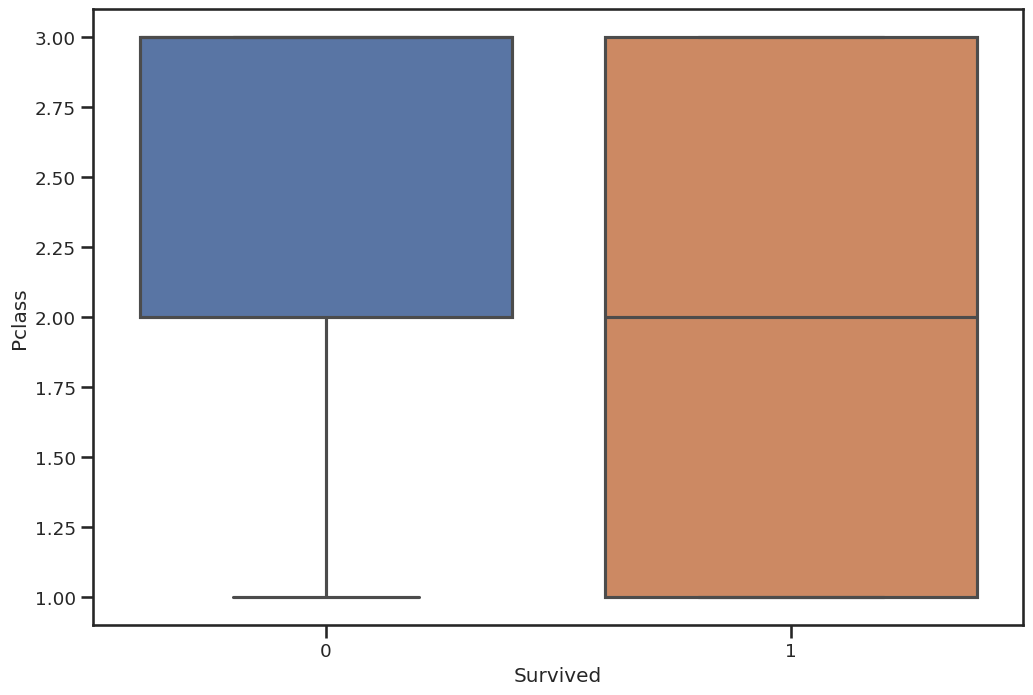

In [135]:
# Observando diferenças nas distribuições
sns.boxplot(data=df, x='Survived', y='Pclass');

## **Observando correlação (linear)**

A correlação linear é uma medida estatística que indica o grau de relação entre duas variáveis quantitativas, ou seja, quanto uma variação em uma delas é associada a uma variação na outra.

Um gráfico de dispersão é uma maneira comum de visualizar a correlação linear entre duas variáveis. Se os pontos no gráfico parecem formar uma linha reta, isso sugere que há uma correlação linear positiva ou negativa entre as variáveis. Uma correlação linear positiva significa que as duas variáveis se movem na mesma direção, enquanto uma correlação linear negativa significa que elas se movem em direções opostas.

Um exemplo seria a análise da correlação linear entre a altura e o peso de uma amostra de indivíduos. Um gráfico de dispersão pode ser criado com a altura no eixo x e o peso no eixo y. Se a maioria dos pontos no gráfico formar uma linha crescente, isso sugere uma correlação linear positiva, indicando que indivíduos mais altos tendem a ter um peso maior.

É importante lembrar que a correlação linear não indica causalidade, ou seja, não é possível afirmar que uma variável causa a outra apenas com base na sua correlação. Outros tipos de análises devem ser feitas para avaliar a relação causal entre as variáveis.



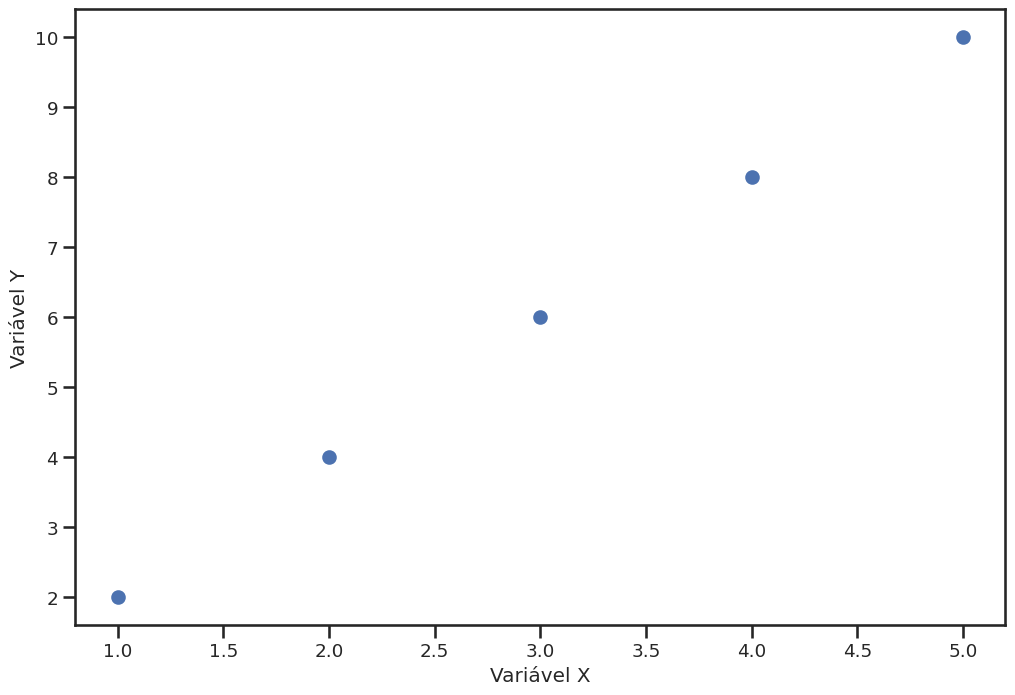

In [136]:
# Observando correlação linear (Gráfico de dispersão)
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

plt.scatter(x, y)

plt.xlabel('Variável X')
plt.ylabel('Variável Y')

plt.show()


Heatmap é um tipo de gráfico que representa uma matriz de dados em cores, onde cada valor é atribuído a uma cor específica. É uma forma de visualizar a intensidade de valores em uma matriz e identificar padrões e correlações entre variáveis.Esse tipo de análise é particularmente útil para identificar padrões de correlação linear entre as variáveis.

Cada célula da matriz representa a correlação entre duas variáveis, e a cor da célula indica o valor da correlação, variando de cores mais frias (azul) para cores mais quentes (vermelho). O heatmap permite identificar facilmente variáveis que estão altamente correlacionadas e podem ser redundantes em uma análise, ou variáveis que apresentam correlações negativas.

<ipython-input-137-cdee44c71e27>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='RdBu_r', center=0, annot=True);


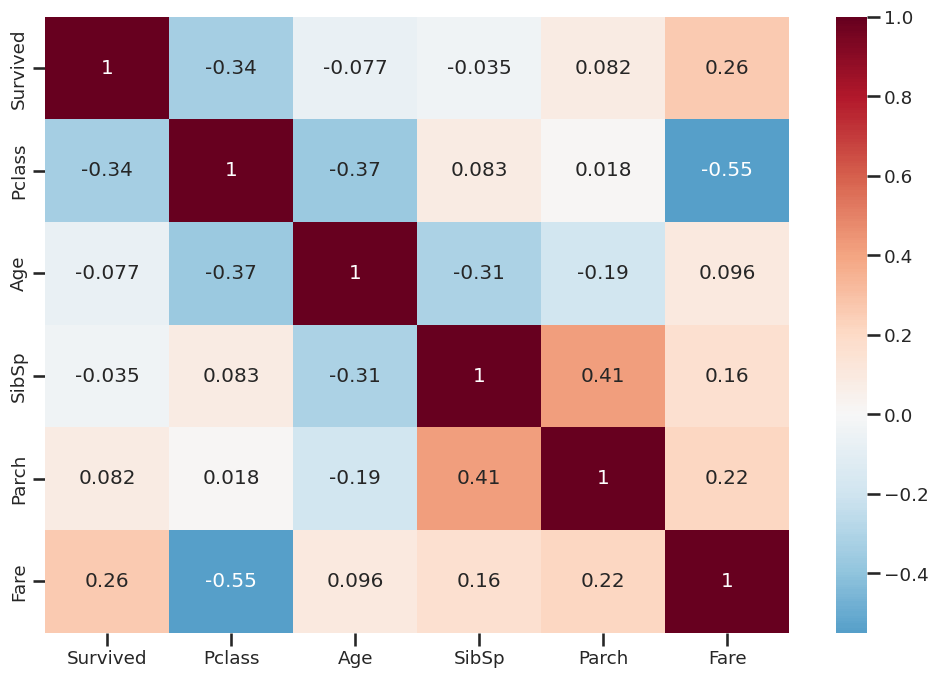

In [137]:
# Observando correlação linear (heatmap)
sns.heatmap(df.corr(), cmap='RdBu_r', center=0, annot=True);

### Mutual information

Mutual Information é uma medida estatística que mede a dependência mútua entre duas variáveis. Em Feature Engineering, pode ser utilizada para selecionar as variáveis mais relevantes para um modelo preditivo, com base na sua relação com a variável alvo.

O processo de seleção de variáveis é realizado em duas etapas. Na primeira etapa, é calculada a mutual information entre cada variável independente e a variável dependente. Na segunda etapa, as variáveis independentes com maior valor de mutual information são selecionadas como features para o modelo.

A seleção de variáveis pode ser realizada por meio de diversas bibliotecas em Python, como o scikit-learn e o pandas. O scikit-learn oferece a classe SelectKBest, que permite selecionar as K melhores features com base na mutual information. Já o pandas oferece a função pd.Series.mutual_info_score, que permite calcular a mutual information entre duas séries.

É importante lembrar que a seleção de variáveis com base na mutual information não é o único critério a ser considerado na escolha das features para um modelo preditivo. É necessário avaliar também outros critérios, como a correlação entre as variáveis independentes, a interpretabilidade do modelo e a performance do modelo em dados de teste.



In [139]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

In [140]:
# Drop columns and NAs
df_model = df.drop(columns=['Name','Ticket','Cabin']).dropna()
df_model.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,personal_title
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,Mr
2,1,1,female,38.0,1,0,71.2833,C,Mrs
3,1,3,female,26.0,0,0,7.9250,S,Miss
4,1,1,female,35.0,1,0,53.1000,S,Mrs
5,0,3,male,35.0,0,0,8.0500,S,Mr


In [146]:
target = df_model['Survived']
df_features = df_model.drop(columns='Survived')

In [147]:
from sklearn.preprocessing import OrdinalEncoder

# Selecionar as colunas de interesse
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# Converter as variáveis categóricas para númericas
encoder = OrdinalEncoder()
df['Sex'] = encoder.fit_transform(df[['Sex']])
df['Embarked'] = encoder.fit_transform(df[['Embarked']])

df = df.dropna()
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1.0,22.0,1,0,7.2500,2.0
2,1,1,0.0,38.0,1,0,71.2833,0.0
3,1,3,0.0,26.0,0,0,7.9250,2.0
4,1,1,0.0,35.0,1,0,53.1000,2.0
5,0,3,1.0,35.0,0,0,8.0500,2.0
...,...,...,...,...,...,...,...,...
886,0,3,0.0,39.0,0,5,29.1250,1.0
887,0,2,1.0,27.0,0,0,13.0000,2.0
888,1,1,0.0,19.0,0,0,30.0000,2.0


In [148]:
# Selecionar as variáveis que serão utilizadas para treinar o modelo, bem como a variável alvo
X = df.drop(['Survived'], axis=1)
y = df['Survived']


In [149]:
discrete_features = df.dtypes==int
discrete_features

Survived     True
Pclass       True
Sex         False
Age         False
SibSp        True
Parch        True
Fare        False
Embarked    False
dtype: bool

In [154]:
scores = mutual_info_classif(X, y, discrete_features='auto', n_neighbors=3, copy=True, random_state=None)
scores


array([0.08214641, 0.14276783, 0.03194318, 0.03014759, 0.        ,
       0.15182145, 0.01122511])

In [161]:
mi_scores = pd.Series(scores, index=X.columns)
mi_scores

Pclass      0.082146
Sex         0.142768
Age         0.031943
SibSp       0.030148
Parch       0.000000
Fare        0.151821
Embarked    0.011225
dtype: float64

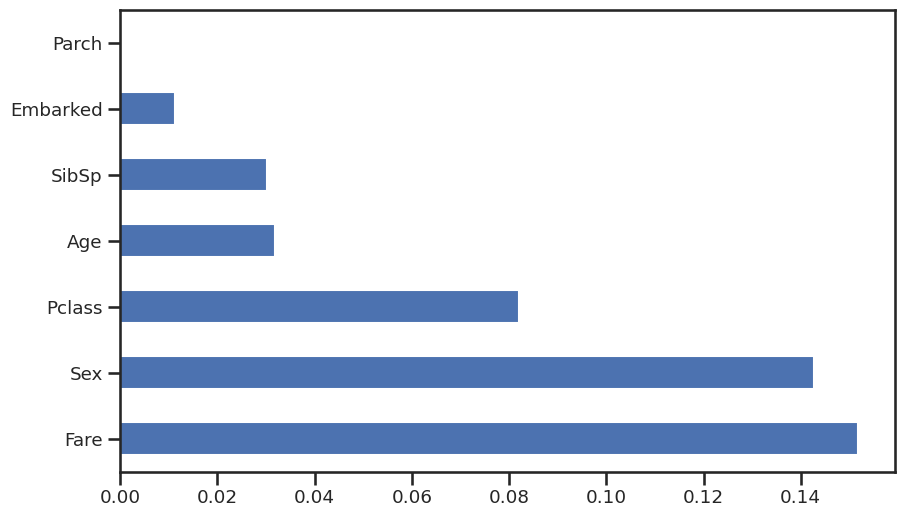

In [170]:
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores.plot.barh(figsize=(10,6))
plt.show()

# O gráfico resultante mostrará as variáveis ordenadas pela sua informação mútua com a variável alvo, 
# permitindo a seleção das variáveis mais importantes para o modelo.

**Observação:** MI, assim como correlação, é uma métrica **univariada**, portanto, não necessariamente uma variável com baixo score de MI vai ter pouca importância para o modelo, pois pode ser que, quando associada à outra variável, ambas variáveis contribuam para o modelo.

# Pipelines

Pipeline é uma ferramenta do scikit-learn que permite encadear várias etapas de pré-processamento e modelagem em uma única sequência. É possível automatizar a sequência de etapas de um fluxo de trabalho de aprendizado de máquina.

É uma maneira conveniente de garantir que as etapas do pré-processamento e da modelagem sejam executadas na ordem correta, além de ser útil para aplicar o mesmo conjunto de transformações em conjuntos de dados de treinamento e teste.

Por exemplo, imagine que queremos treinar um modelo de regressão linear em um conjunto de dados que contém valores faltantes. Podemos usar um Pipeline para preencher os valores faltantes com a média das colunas, em seguida, normalizar os dados antes de ajustar o modelo.

O Pipeline é uma classe do scikit-learn que recebe uma lista de tuplas, onde cada tupla representa uma etapa do pipeline. Cada tupla contém o nome da etapa e o objeto correspondente que implementa a transformação ou modelagem. A última etapa do pipeline deve ser um objeto estimador que implementa o método fit() para ajustar o modelo.

Ele pode ser treinado usando o método fit() e usado para fazer previsões em novos conjuntos de dados usando o método predict().


In [1]:
from sklearn import set_config
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import StandardScaler, PowerTransformer, OneHotEncoder

set_config(display="diagram")

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv', index_col='PassengerId')
df['personal_titles'] = df.Name.str.extract('.*, (.+?)\.', expand=False)
df = df.drop(columns=['Name','Ticket','Cabin']).dropna()

df_features = df.drop(columns='Survived')
target = df['Survived']

df_features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,personal_titles
PassengerId,,,,,,,,
1,3,male,22.0,1,0,7.2500,S,Mr
2,1,female,38.0,1,0,71.2833,C,Mrs
3,3,female,26.0,0,0,7.9250,S,Miss
4,1,female,35.0,1,0,53.1000,S,Mrs
5,3,male,35.0,0,0,8.0500,S,Mr


# **Selecionando features numéricas e categóricas**

Podemos selecionar as colunas numéricas e categóricas usando as classes **ColumnTransforme**r e **make_column_selector**.

A classe **make_column_selector** é usada para selecionar as colunas com base em suas propriedades, como o tipo de dado. 

Por exemplo, podemos usar **make_column_selector(dtype_include=np.number)** para selecionar todas as colunas com tipo de dados numérico. Para selecionar as colunas categóricas, podemos usar **make_column_selector(dtype_include=object)** ou **make_column_selector(dtype_exclude=np.number)**.

A classe **ColumnTransformer** permite aplicar transformações diferentes a diferentes conjuntos de colunas. Podemos usar esta classe para aplicar transformações diferentes às colunas numéricas e categóricas. Por exemplo:

    numerical_features = make_column_selector(dtype_include=np.number)
    categorical_features = make_column_selector(dtype_exclude=np.number)

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(), categorical_features)])


Neste exemplo, selecionamos as colunas numéricas usando **make_column_selector(dtype_include=np.number)** e aplicamos a transformação de escalonamento padrão usando **StandardScaler()**. Para as colunas categóricas, selecionamos usando **make_column_selector(dtype_exclude=np.number)** e aplicamos a transformação **OneHotEncoder()**. Finalmente, combinamos as transformações usando **ColumnTransformer()**.

In [10]:
# Selecionando features numéricas e categóricas
numerical_features = df_features.select_dtypes('number').columns
categorical_features = df_features.select_dtypes(exclude='number').columns

print(numerical_features)
print(categorical_features)

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Index(['Sex', 'Embarked', 'personal_titles'], dtype='object')


# **Aplicando column transformer**

O **ColumnTransformer** é uma ferramenta muito útil para aplicar transformações diferentes em colunas diferentes de um conjunto de dados. É especialmente útil quando temos colunas numéricas e categóricas e queremos aplicar diferentes transformações em cada uma delas.

No pipeline, é utilizado para aplicar diferentes transformações em diferentes colunas. Aqui está um exemplo de como aplicar o ColumnTransformer em um pipeline:

    from sklearn.compose import ColumnTransformer
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler, OneHotEncoder

    # exemplo de dados com colunas numéricas e categóricas
    X = df.drop('target', axis=1)
    y = df['target']

    # criando o transformer para as colunas numéricas
    num_transformer = Pipeline(steps=[
       ('scaler', StandardScaler())
    ])

    # criando o transformer para as colunas categóricas
    cat_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder())
    ])

    # criando o column transformer para aplicar os transformers nas colunas
    corretas
    preprocessor = ColumnTransformer(transformers=[
        ('num', num_transformer, ['age', 'fare']),
        ('cat', cat_transformer, ['sex', 'embarked'])
    ])

    # adicionando o preprocessor no pipeline
    pipeline = Pipeline(steps=[
       ('preprocessor', preprocessor),
       ('classifier', LogisticRegression())
    ])

    # treinando e testando o modelo
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

Neste exemplo, criamos dois transformers diferentes: um para as colunas numéricas e outro para as colunas categóricas. Em seguida, criamos um ColumnTransformer e especificamos que queremos aplicar o transformer numérico nas colunas **age** e **fare**, e o transformer categórico nas colunas **sex** e **embarked**. Por fim, adicionamos o preprocessor ao pipeline, seguido do classificador.

Desta forma, cada transformer é aplicado apenas nas colunas corretas e temos um pipeline completo que lida com diferentes tipos de dados.

In [11]:
# Aplicando column transformer
preprocessing_pipeline = make_column_transformer(
    [StandardScaler(), numerical_features],
    [OneHotEncoder(), categorical_features]
)

preprocessing_pipeline

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                ('onehotencoder', OneHotEncoder(),
                                 Index(['Sex', 'Embarked', 'personal_titles'], dtype='object'))])

In [12]:
preprocessing_pipeline.fit(df_features)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                ('onehotencoder', OneHotEncoder(),
                                 Index(['Sex', 'Embarked', 'personal_titles'], dtype='object'))])

In [13]:
pd.DataFrame(
  data=preprocessing_pipeline.transform(df_features).toarray(),
  columns=preprocessing_pipeline.get_feature_names_out()
)

,standardscaler__Pclass,standardscaler__Age,standardscaler__SibSp,standardscaler__Parch,standardscaler__Fare,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,...,onehotencoder__personal_titles_Master,onehotencoder__personal_titles_Miss,onehotencoder__personal_titles_Mlle,onehotencoder__personal_titles_Mme,onehotencoder__personal_titles_Mr,onehotencoder__personal_titles_Mrs,onehotencoder__personal_titles_Ms,onehotencoder__personal_titles_Rev,onehotencoder__personal_titles_Sir,onehotencoder__personal_titles_the Countess
0,0.908600,-0.527669,0.522511,-0.506787,-0.516380,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-1.482983,0.577094,0.522511,-0.506787,0.694046,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.908600,-0.251478,-0.552714,-0.506787,-0.503620,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.482983,0.369951,0.522511,-0.506787,0.350326,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.908600,0.369951,-0.552714,-0.506787,-0.501257,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0.908600,0.646142,-0.552714,5.350885,-0.102875,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
708,-0.287191,-0.182430,-0.552714,-0.506787,-0.407687,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
709,-1.482983,-0.734812,-0.552714,-0.506787,-0.086335,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
710,-1.482983,-0.251478,-0.552714,-0.506787,-0.086335,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# **Múltiplos processamentos no column transformer**

É possível aplicar diferentes transformações em diferentes colunas do conjunto de dados. No entanto, às vezes, é necessário aplicar várias transformações a uma única coluna.

Nesses casos, é possível criar um pipeline que aplique várias transformações a uma coluna específica antes de passar para o ColumnTransformer. Para isso, é possível usar o Pipeline do scikit-learn.

Por exemplo, suponha que temos um conjunto de dados com uma coluna chamada age que contém os dados de idade dos indivíduos. Digamos que queremos aplicar as seguintes transformações a esta coluna:

* Preencher valores ausentes com a média
* Padronizar os valores para ter média zero e desvio padrão unitário
* Aplicar um polinômio de grau 2 para gerar características polinomiais

Podemos criar um pipeline que aplique essas três transformações na coluna age, e então usá-lo como uma das transformações no ColumnTransformer. O código para fazer isso seria:

    from sklearn.pipeline import Pipeline
    from sklearn.impute import SimpleImputer
    from sklearn.preprocessing import StandardScaler, PolynomialFeatures

    age_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2))
    ])

    preprocessor = ColumnTransformer([
       ('age', age_pipeline, ['age']),
       # ... outras transformações aqui ...
    ])

Dessa forma, o age_pipeline irá preencher valores ausentes com a média, padronizar os valores e gerar características polinomiais antes de passar a coluna age transformada para o ColumnTransformer. O preprocessor final então poderá incluir outras transformações que precisamos aplicar em outras colunas do conjunto de dados.

In [14]:
# Múltiplos processamentos no column transformer
# Aplicando column transformer
preprocessing_pipeline = make_column_transformer(
    [make_pipeline(PowerTransformer(), StandardScaler()), numerical_features],
    [OneHotEncoder(), categorical_features]
)

preprocessing_pipeline.fit(df_features)

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('powertransformer',
                                                  PowerTransformer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                ('onehotencoder', OneHotEncoder(),
                                 Index(['Sex', 'Embarked', 'personal_titles'], dtype='object'))])

In [15]:
# Colocando resultado em dataframe
pd.DataFrame(
  data=preprocessing_pipeline.transform(df_features).toarray(),
  columns=preprocessing_pipeline.get_feature_names_out()
)

,pipeline__Pclass,pipeline__Age,pipeline__SibSp,pipeline__Parch,pipeline__Fare,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,...,onehotencoder__personal_titles_Master,onehotencoder__personal_titles_Miss,onehotencoder__personal_titles_Mlle,onehotencoder__personal_titles_Mme,onehotencoder__personal_titles_Mr,onehotencoder__personal_titles_Mrs,onehotencoder__personal_titles_Ms,onehotencoder__personal_titles_Rev,onehotencoder__personal_titles_Sir,onehotencoder__personal_titles_the Countess
0,0.940654,-0.469528,1.290366,-0.609138,-0.997650,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-1.409998,0.609720,1.290366,-0.609138,1.287757,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.940654,-0.186239,-0.716478,-0.609138,-0.901073,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.409998,0.417070,1.290366,-0.609138,1.024276,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.940654,0.417070,-0.716478,-0.609138,-0.884112,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0.940654,0.673133,-0.716478,1.785665,0.455301,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
708,-0.430593,-0.117045,-0.716478,-0.609138,-0.369789,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
709,-1.409998,-0.689838,-0.716478,-0.609138,0.484313,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
710,-1.409998,-0.186239,-0.716478,-0.609138,0.484313,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Conclusão do módulo

Neste módulo, vocês aprenderam:

- Como identificar e lidar com valores duplicados
- Como identificar e lidar com valores faltantes
- Como identificar e lidar com outliers
- Como identificar e lidar com dados inconsistentes através de análise univariada
- Como identificar variáveis potencialmente importantes para o modelo através da análise multivariada
- Como transformar seus dados numéricos e categóricos para aplicação do modelo
- Como estruturar os seus dados
- Como criar novas variáveis para o modelo
- Como estruturar um pipeline de pré-tratamento dos dados

In [16]:
import seaborn as sns
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
